In [65]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import vincenty, geodesic, distance
from sklearn.svm import SVR


In [2]:
# load train and test data
df_mess_train = pd.read_csv('mess_train_list.csv')
df_mess_test = pd.read_csv('mess_test_list.csv')
pos_train = pd.read_csv('pos_train_list.csv')

In [3]:
df_mess_train.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
0,573bf1d9864fce1a9af8c5c9,2841,473335.0,0.5,-121.5,1.463546e+12,39.617794,-104.954917
1,573bf1d9864fce1a9af8c5c9,3526,473335.0,2.0,-125.0,1.463546e+12,39.677251,-104.952721
2,573bf3533e952e19126b256a,2605,473335.0,1.0,-134.0,1.463547e+12,39.612745,-105.008827
3,573c0cd0f0fe6e735a699b93,2610,473953.0,2.0,-132.0,1.463553e+12,39.797969,-105.073460
4,573c0cd0f0fe6e735a699b93,3574,473953.0,1.0,-120.0,1.463553e+12,39.723151,-104.956216


In [4]:
pos_train.head()

,lat,lng
0,39.606690,-104.958490
1,39.606690,-104.958490
2,39.637741,-104.958554
3,39.730417,-104.968940
4,39.730417,-104.968940


In [5]:
listOfBs = np.union1d(np.unique(df_mess_train['bsid']), np.unique(df_mess_test['bsid'])) # determine all Base stations that received at least 1 message

In [6]:
len(listOfBs)

259

In [25]:
df_mess_bs_group = df_mess_train.groupby(['messid'], as_index=False) # group data by message (messid)
for key, elmt in df_mess_bs_group:
    #print(elmt.rssi)
    print(df_mess_bs_group.get_group(key)['bsid'].iloc[0])

2841
2605
2610
1859
1086
1859
1264
2605
1264
8245
3558
8397
2846
2841
2841
1872
1476
2841
2610
1741
1878
1741
1859
1741
1741
1741
1264
4058
1264
1872
1859
3500
3403
3500
1741
1086
1741
2784
1859
1741
3846
2841
3548
1878
1741
1741
1741
1859
2841
2841
1878
4056
1859
2841
1012
1741
1741
1741
1741
1741
1741
1878
1741
1741
1741
1996
1741
1741
2841
1741
8356
4056
1859
2610
1012
1012
2605
2841
1878
1741
1859
1859
1741
1859
1741
3571
2605
1741
2605
1086
3579
1859
1264
1859
1859
3410
1859
3579
3357
1476
2189
2610
1264
1264
1264
1264
3570
1012
4058
1741
1086
2605
1741
2999
1878
3357
1878
1741
8356
2841
2841
1826
2841
2841
1086
2999
1012
1476
1741
1859
1476
2617
1859
1859
2189
2841
2841
3548
3548
2841
1859
1859
3025
1859
1476
2610
1859
2605
1476
4056
1859
2841
2841
3629
2610
4056
2605
3556
1878
2605
7456
4058
1859
2610
2610
2610
1878
1264
8352
1872
2610
1476
4058
1476
3578
1476
1476
1086
3410
1878
1996
3410
1878
3051
3051
7692
3051
7692
2605
1872
1476
2610
1878
1741
1859
1878
1859
1012
1012
1012


3410
1741
1741
1741
1594
1476
2610
4157
1741
1988
1741
7692
1741
7692
1741
3051
3051
3051
1012
2775
1859
10162
2610
2610
3548
1878
3403
1264
8356
1344
2841
2841
2776
2841
1859
3414
1741
1741
1741
3500
1594
1741
3410
1878
1741
1741
1594
1859
1741
1878
2999
3410
2831
1344
7986
1594
1594
1859
3556
1594
1594
1594
1741
1988
1086
1086
1594
1594
1344
1344
3846
1344
1878
2776
2841
2841
2841
1741
2799
1344
3412
3527
1878
980
8474
1086
1741
1741
1878
7857
3529
1594
1859
1741
2831
1268
2831
3846
3578
1741
1878
1859
2831
2831
1229
2799
2799
1594
3548
1344
1344
2831
2831
1012
2610
1859
1344
2831
3527
3574
1878
3548
1264
3527
2831
1229
8356
8356
3574
4056
3574
3410
1344
1859
3547
3563
1996
3846
2776
2831
2610
2831
3402
8474
1741
3574
1741
1741
3574
1741
8355
1741
1344
8446
1264
3548
7382
1264
1859
2831
3553
1344
1476
1859
2775
2831
1344
1268
1268
7382
2605
2831
2831
8453
3527
2831
8356
1987
2610
1741
1741
1878
2841
1859
2831
1344
3563
1741
1741
2831
1741
1741
2776
1859
3570
3412
2610
1264
1878
3410


2831
2831
2831
1872
8451
2605
2831
3613
1344
4790
4790
4024
3613
1859
1661
1878
2189
2189
1878
1661
3613
1661
1264
1878
4056
1661
3414
1878
2189
2189
2189
1878
2189
1878
2189
3562
3556
1594
4993
2617
2605
1859
1661
3613
3613
3613
1859
1859
1594
1859
1859
2605
3025
3613
3613
3613
2605
2605
2605
8451
4058
1120
1264
3613
3613
1859
2605
4058
1878
3613
3613
1859
3574
1859
1594
1859
3547
7986
3581
2846
2605
3846
3613
3613
3556
4156
4993
2731
2731
3556
1859
1859
1344
2831
2831
1859
1859
3547
2605
1594
4156
3412
4058
1264
3500
3500
2617
3414
3548
1344
2776
3526
1086
2799
1264
3613
3613
3613
1859
1594
1264
1264
3613
3613
4058
2189
2189
2189
4157
1859
8446
1878
2831
2999
2617
2999
2999
8446
2999
3538
1859
8470
3548
2189
1012
1859
1264
2846
1264
1264
1264
1264
1264
1264
1264
2799
3527
3846
2831
3548
8453
1859
1859
1859
1859
1859
8364
4790
2799
3613
1878
2799
1859
3538
3613
3548
7382
1859
2693
2617
3410
1859
2862
1594
1594
3846
1086
3846
4058
3613
1859
2605
1661
1859
2999
1661
1661
1594
2831
1594


1743
1743
1743
1859
1743
1743
1743
1743
1743
1743
1743
1743
1743
1743
1772
1743
1743
1743
1743
1743
1743
1743
1743
1743
1743
1743
1743
1743
1743
1743
1743
1743
1743
1743
1344
2831
10162
1594
1594
1878
4790
3613
1878
3051
1878
7692
1743
1594
7692
3051
3051
3559
1594
3051
2617
3562
1878
7692
1859
3051
3051
3562
1743
8446
3051
2189
3051
1859
8355
8355
4987
8449
1229
3559
1743
2731
1796
8355
2617
3562
2189
8446
2189
2617
1743
4129
1772
1743
1743
2831
1878
1859
3613
8446
3613
1772
1187
3572
3613
3051
1264
3581
4024
3613
1743
1859
1859
3527
2831
1229
1661
4056
1594
2799
1859
3613
1012
1988
1878
1988
2189
1772
3613
1594
7655
944
1988
1772
4790
4790
2189
3613
8446
1878
2189
3536
2790
1772
2731
1594
1796
1772
2707
3548
8355
2831
1344
8446
2790
10162
1594
1772
2831
1344
1264
3613
1878
3613
2605
4058
3386
8245
3613
1264
1264
1264
3613
1264
1872
3613
1594
1743
1264
1859
1661
3581
1264
1086
8356
1264
2707
1859
8446
2731
2831
1988
2831
1086
2831
1086
1344
1086
1086
1772
2731
7849
1594
1859
2768
1594

In [30]:
# Feature Matrix construction 

def feat_mat_const(df_mess_train, listOfBs):

    df_mess_bs_group = df_mess_train.groupby(['messid'], as_index=False) # group data by message (messid)
    nb_mess = len(np.unique(df_mess_train['messid']))
    columns = []
    attrs = ["nseq", "rssi", "time_ux", "bs_lat", "bs_lng"]
    for c in attrs:
        for bsid in listOfBs:
            columns.append(c+"_"+str(bsid))
    
    df_feat = pd.DataFrame(np.zeros((nb_mess,len(listOfBs)*5)), columns = columns) # feature matrix
    idx = 0
    id_list = [0] * nb_mess
    
    for key, elmt in df_mess_bs_group:
        df_mess_bs_group.get_group(key)
        for i, bsid in enumerate(df_mess_bs_group.get_group(key)["bsid"]):
            for c in attrs:       
                df_feat.loc[idx,[c+"_"+str(bsid)]] = df_mess_bs_group.get_group(key)[c].iloc[i]
            
        id_list[idx] = key
        idx = idx + 1
    
    return df_feat, id_list # add id value of each message for the correspondance to message  

In [9]:
# ground truth construction

def ground_truth_const(df_mess_train, pos_train):

    df_mess_pos = df_mess_train.copy()
    df_mess_pos[['lat', 'lng']] = pos_train

    ground_truth_lat = np.array(df_mess_pos.groupby(['messid']).mean()['lat'])
    ground_truth_lng = np.array(df_mess_pos.groupby(['messid']).mean()['lng'])
    
    return ground_truth_lat, ground_truth_lng

In [34]:
df_feat, id_list_train = feat_mat_const(df_mess_train, listOfBs)

,nseq_879,nseq_911,nseq_921,nseq_944,nseq_980,nseq_1012,nseq_1086,nseq_1092,nseq_1120,nseq_1131,...,bs_lng_9936,bs_lng_9941,bs_lng_9949,bs_lng_10134,bs_lng_10148,bs_lng_10151,bs_lng_10162,bs_lng_10999,bs_lng_11007,bs_lng_11951
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_feat.loc[200:400, ["bs_lng_10134", "bs_lat_10134"]]

,bs_lng_10134,bs_lat_10134
200,0.00000,0.00000
201,0.00000,0.00000
202,0.00000,0.00000
203,0.00000,0.00000
204,0.00000,0.00000
205,0.00000,0.00000
206,0.00000,0.00000
207,0.00000,0.00000
208,0.00000,0.00000
209,0.00000,0.00000


In [32]:
df_feat["nseq_1086"].unique()

array([0. , 2. , 1. , 0.5, 1.5])

In [33]:
df_feat["rssi_1086"].unique()

array([   0.        , -141.        , -133.        , -135.5       ,
       -134.5       , -134.        , -138.5       , -138.        ,
       -134.33333333, -139.        , -140.        , -135.33333333,
       -130.5       , -129.        , -140.5       , -139.33333333,
       -131.        , -140.66666667, -142.        , -136.        ,
       -135.        , -128.33333333, -137.        , -136.5       ,
       -137.5       , -128.        , -124.5       , -135.66666667,
       -130.        , -131.5       ])

In [11]:
ground_truth_lat, ground_truth_lng = ground_truth_const(df_mess_train, pos_train)
ground_truth_lat.shape

(6068,)

In [12]:
# Validation

In [41]:
def regressor_and_predict(df_feat, ground_truth_lat, ground_truth_lng, df_test):
    
    # train regressor and make prediction in the train set
    # Input: df_feat, ground_truth_lat, ground_truth_lng, df_test
    # Output: y_pred_lat, y_pred_lng

    from sklearn import linear_model

    X_train = np.array(df_feat);
    reg = linear_model.LinearRegression()

    reg.fit(X_train, ground_truth_lat);
    y_pred_lat = reg.predict(df_test) 

    reg.fit(X_train, ground_truth_lng);
    y_pred_lng = reg.predict(df_test) 
    
    return y_pred_lat, y_pred_lng


In [73]:
def svr_and_predict(df_feat, ground_truth_lat, ground_truth_lng, df_test):
    X_train = np.array(df_feat)
    
    #svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin = SVR(kernel='linear', C=1e3)
    
    y_pred_lat = svr_lin.fit(X_train, ground_truth_lat).predict(df_test)
    print("score lat".format(svr_lin.score(X_train,ground_truth_lat)))
    
    y_pred_lng = svr_lin.fit(X_train, ground_truth_lng).predict(df_test)
    print("score lng".format(svr_lin.score(X_train,ground_truth_lng)))
    
    return y_pred_lat, y_pred_lng

In [14]:
# Make regressor and prediction using the train set

In [ ]:
#y_pred_lat, y_pred_lng = regressor_and_predict(df_feat, ground_truth_lat, ground_truth_lng, df_feat)
y_pred_lat, y_pred_lng = svr_and_predict(df_feat, ground_truth_lat, ground_truth_lng, df_feat)

In [68]:
display(pd.DataFrame([y_pred_lat, y_pred_lng]))

,0,1,2,3,4,5,6,7,8,9,...,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067
0,39.706286,39.737674,39.830570,39.792688,39.858247,39.853667,39.852526,39.758414,39.850878,39.866692,...,39.799293,39.799713,39.798667,39.792496,40.742793,39.865239,39.758397,39.866692,39.866692,39.866692
1,-105.058615,-105.058510,-105.068527,-105.106903,-105.142545,-105.142545,-105.142545,-105.108397,-105.142545,-105.142545,...,-105.142545,-105.142545,-105.142545,-105.106990,-105.813656,-105.104123,-105.108427,-105.119418,-105.113600,-105.142545


In [ ]:
# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
y_pred_lng = cross_val_predict(reg, df_feat, ground_truth_lng, cv=10)
y_pred_lat = cross_val_predict(reg, df_feat, ground_truth_lat, cv=10)

In [ ]:
# Evaluate result

In [58]:
def vincenty_vec(vec_coord):
    vin_vec_dist = np.zeros(vec_coord.shape[0])
    if vec_coord.shape[1] !=  4:
        print('ERROR: Bad number of columns (shall be = 4)')
    else:
        vin_vec_dist = [geodesic(vec_coord[m,0:2],vec_coord[m,2:]).meters for m in range(vec_coord.shape[0])]
    return vin_vec_dist

In [59]:
# evaluate distance error for each predicted point
def Eval_geoloc(y_train_lat , y_train_lng, y_pred_lat, y_pred_lng):
    vec_coord = np.array([y_train_lat , y_train_lng, y_pred_lat, y_pred_lng])
    err_vec = vincenty_vec(np.transpose(vec_coord))
    
    return err_vec

In [69]:
err_vec = Eval_geoloc(ground_truth_lat , ground_truth_lng, y_pred_lat, y_pred_lng)

In [70]:
err_vec

[14004.06038818283,
 14022.430596413522,
 14015.577547286564,
 13985.312864904328,
 13598.081063198388,
 13257.592540205686,
 13116.160226741855,
 13999.020065690534,
 12179.019882855151,
 8545.865260347584,
 9821.861805931898,
 14023.297269155655,
 14009.07545495492,
 14000.37163808782,
 14028.484883378533,
 8579.610681652279,
 8197.633282867859,
 14014.668169570823,
 9017.200490618146,
 8948.743757378365,
 8842.791206369622,
 10209.769386090584,
 13994.290580948003,
 11359.65823932665,
 11775.577374414717,
 12192.841024776573,
 12235.3149532431,
 11820.516427842696,
 11458.00803259832,
 12549.632980414797,
 13315.45386366611,
 11883.832092913806,
 12094.61855524056,
 8193.65246084232,
 9395.247347944885,
 11953.242057314066,
 10387.408161263196,
 14002.473253221471,
 14020.171526546734,
 8822.766000078978,
 14034.905248011375,
 14043.401058874711,
 14013.556269370962,
 8921.808111352671,
 9560.224542472146,
 10369.410065938226,
 10392.333021585746,
 13285.81064661262,
 13986.53950490

In [ ]:
# Plot error distribution

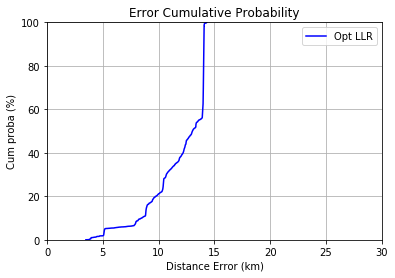

In [71]:
values, base = np.histogram(err_vec, bins=50000)
cumulative = np.cumsum(values) 
plt.figure();
plt.plot(base[:-1]/1000, cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid(); plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100]); 
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

In [72]:
# Error criterion

np.percentile(err_vec, 80)

14029.215560538447

In [ ]:
# Construct test prediction

In [64]:
df_mess_test.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
0,573be2503e952e191262c351,3578,116539.0,2.0,-111.0,1.463542e+12,39.728651,-105.163032
1,573c05f83e952e1912758013,2617,472504.0,0.0,-136.0,1.463551e+12,39.779908,-105.062479
2,573c05f83e952e1912758013,3556,472504.0,0.0,-127.0,1.463551e+12,39.780658,-105.053676
3,573c05f83e952e1912758013,3578,472504.0,0.0,-129.0,1.463551e+12,39.728651,-105.163032
4,573c05f83e952e1912758013,4058,472504.0,0.0,-105.0,1.463551e+12,39.783211,-105.088747


In [ ]:
df_feat_test, id_list_test = feat_mat_const(df_mess_test, listOfBs)

In [ ]:
y_pred_lat, y_pred_lng = regressor_and_predict(df_feat, ground_truth_lat, ground_truth_lng, df_feat_test)

In [ ]:
test_res = pd.DataFrame(np.array([y_pred_lat, y_pred_lng]).T, columns = ['lat', 'lng'])
test_res['messid'] = id_list_test

In [ ]:
test_res.to_csv('pred_pos_test_list.csv', index=False)

In [ ]:
test_res.head()